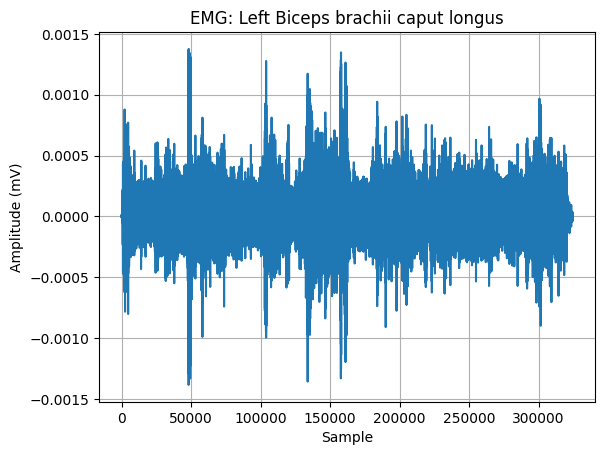

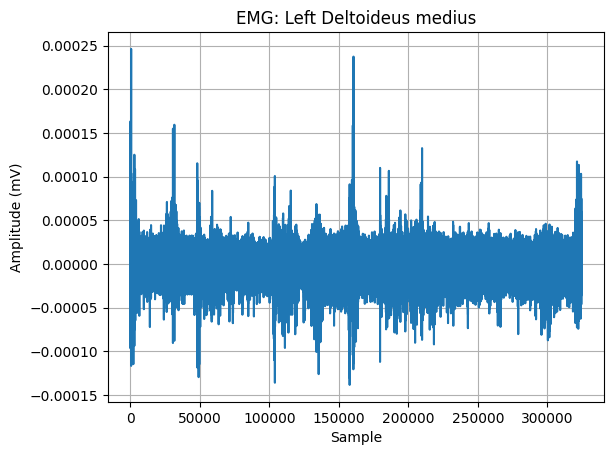

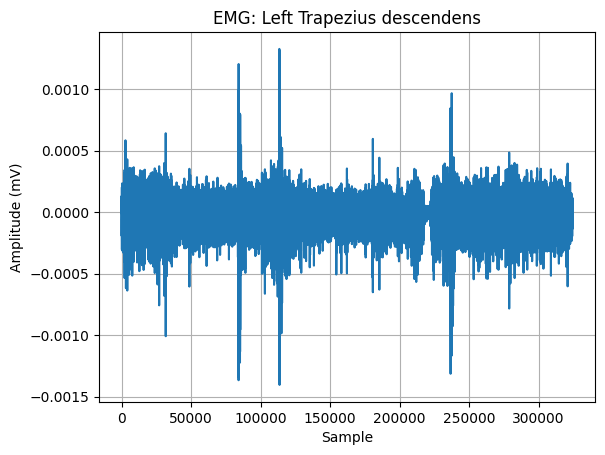

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from basictdf import Tdf

# Load TDF and plot EMG tracks
with Tdf("../data/raw/0001~ab~lat raise.tdf") as tdf:
    if tdf.has_emg:
        emg = tdf.emg
        for track in emg:
            data = track.data
            plt.figure()
            plt.plot(data)
            plt.title(f"EMG: {track.label}")
            plt.xlabel("Sample")
            plt.ylabel("Amplitude (mV)")
            plt.grid(True)
        plt.show()
    else:
        print("No EMG data found in this TDF file.")

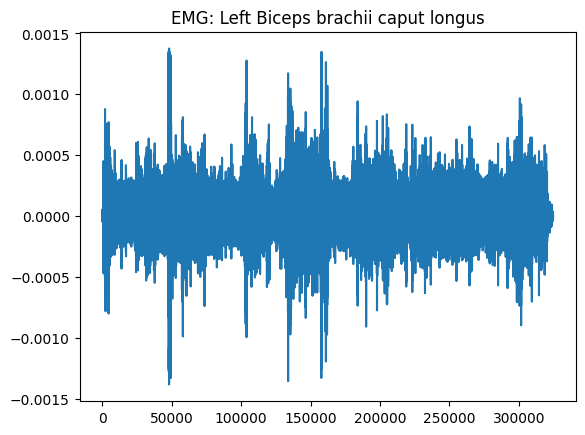

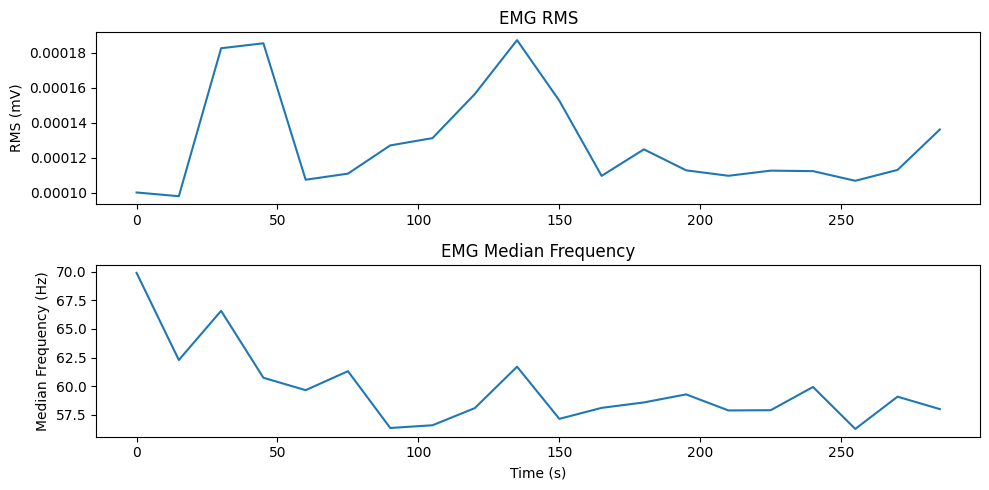

In [13]:
from scipy.signal import welch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


with Tdf("../data/raw/0001~ab~lat raise.tdf") as tdf:
    if tdf.has_emg:
        emg = tdf.emg
        emg_signal = emg[0].data
        plt.figure()
        plt.plot(emg_signal)
        plt.title(f"EMG: {emg[0].label}")

fs = 1000  # Hz

# Sliding window fatigue metrics
def fatigue_metrics(emg, fs, win=30.0, step=15):
    w = int(win*fs)
    s = int(step*fs)
    rms_list, fmed_list, times = [], [], []
    for i in range(0, len(emg)-w, s):
        seg = emg[i:i+w]
        f, Pxx = welch(seg, fs, nperseg=w)
        fmed = np.sum(f * Pxx) / np.sum(Pxx)
        rms = np.sqrt(np.mean(seg**2))
        rms_list.append(rms)
        fmed_list.append(fmed)
        times.append(i/fs)
    return np.array(times), np.array(rms_list), np.array(fmed_list)

times, rms, fmed = fatigue_metrics(emg_signal, fs)

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
plt.plot(times, rms)
plt.title('EMG RMS')
plt.ylabel('RMS (mV)')

plt.subplot(2,1,2)
plt.plot(times, fmed)
plt.title('EMG Median Frequency')
plt.ylabel('Median Frequency (Hz)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()
